In [3]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [5]:
topStared=pd.read_csv("../data/ml_data/graph_data.csv", sep=",")

## Data Info

In [6]:
topStared.head(3)

,Unnamed: 0,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,...,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index
0,0,facebook,react,216019,1369412154,1701996680,16117,1557,25219,26776,...,390639,8.2,1.4,37.6,31396,202,0.01,0.06,1831.576017,57.031450
1,1,pallets,flask,65156,1270552319,1701920931,5205,3,5081,5084,...,13230,8.2,1.5,42.7,1403,3,0.00,0.02,2303.064603,56.321431
2,2,google,guetzli,12840,1477062798,1682192470,145,121,153,274,...,7820,20.2,4.3,169.5,328,16,0.05,0.25,2521.773565,47.127959


In [7]:
topStared = topStared[['owner','repo','stars']]

In [9]:
topStared.shape

(956, 3)

In [10]:
topStared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   owner   956 non-null    object
 1   repo    956 non-null    object
 2   stars   956 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.5+ KB


In [11]:
topStared.isnull().sum()

owner    0
repo     0
stars    0
dtype: int64

In [18]:
topStared

,owner,repo,stars
0,facebook,react,216019
1,pallets,flask,65156
2,google,guetzli,12840
3,EbookFoundation,free-programming-books,304317
4,d3,d3,106797
...,...,...,...
951,natesales,q,1348
952,zestyping,q,1265
953,joschan21,quill,1238
954,cycfi,q,1022


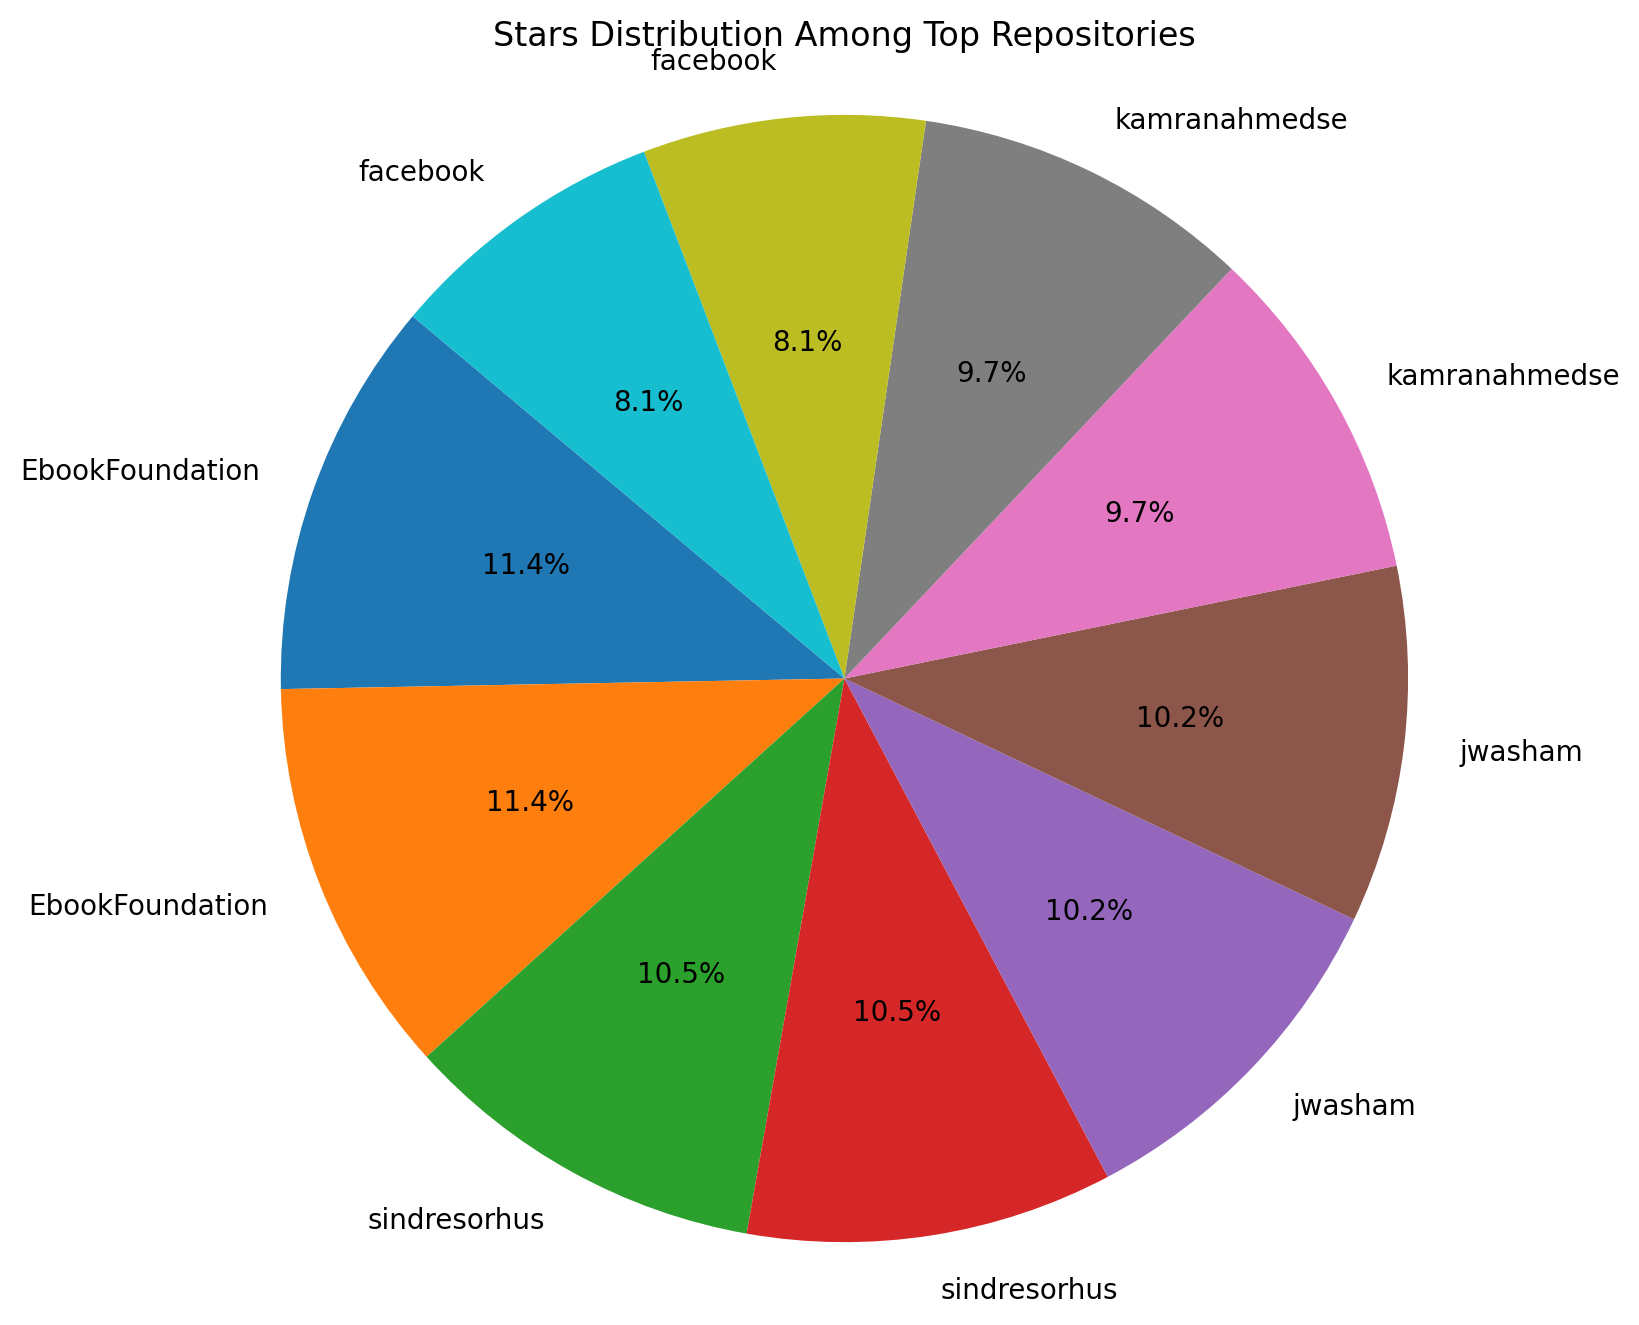

In [20]:
df_sorted = topStared.sort_values(by='stars', ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(df_sorted['stars'], labels=df_sorted['owner'], autopct='%1.1f%%', startangle=140)
plt.title('Stars Distribution Among Top Repositories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


###  Unique data

In [12]:
unique_value_counts = topStared.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

owner    382
repo     428
stars    436
dtype: int64


## Data Cleaning 

# EDA

In [14]:
top_message = topStared['owner'].value_counts().head(10)
top_message

owner
facebook      22
google        22
jashkenas      8
airbnb         8
square         8
slimphp        6
gorhill        6
angular-ui     6
ReactiveX      6
Netflix        6
Name: count, dtype: int64

In [15]:
unique_value_counts = topStared.nunique()
print(unique_value_counts)

owner    382
repo     428
stars    436
dtype: int64


In [16]:
print("\nSummary Statistics:")
topStared.describe()


Summary Statistics:


,stars
count,956.000000
mean,29805.413180
std,35470.047796
min,23.000000
25%,13232.750000
50%,20493.000000
75%,32262.000000
max,304317.000000


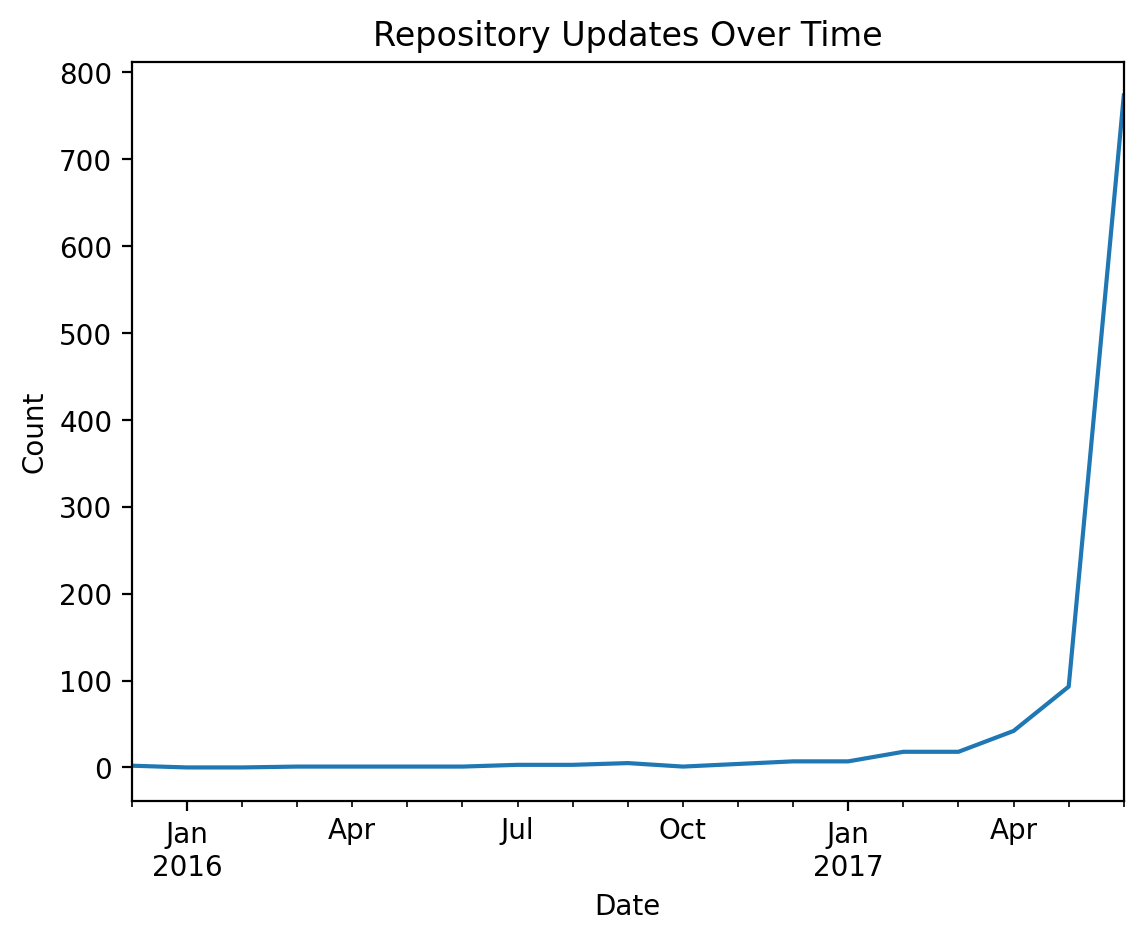

In [14]:
# Time series plot for last update dates
topStared.set_index('Last Update Date').resample('M').size().plot(title='Repository Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show() 